# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

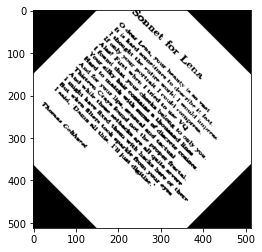

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift
from PIL import Image
import matplotlib.pyplot as plt

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))
plt.imshow(sonrot)
plt.gray()

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def computeFTI(I):
    """ Array -> Array[complex] """
    return ifft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(If)

def toVisualizeFTI(If):
    """ Array[complex] -> Array[float] """
    return ifftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(fftshift(If))

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

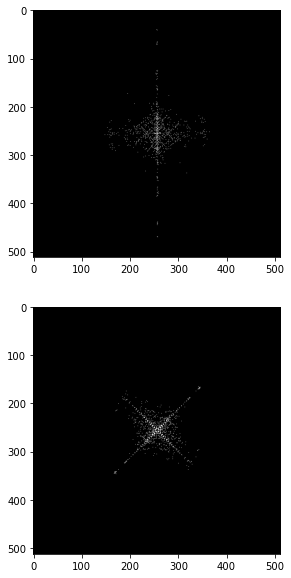

In [3]:
# calcul de la transforme de Fourier et comparaison avec la deuxieme photo incliné a 45 degres 
tf_son = computeFT(son)
tf_sonrot = computeFT(sonrot)
tv_tf_son = toVisualizeFT(tf_son)
tv_tf_sonrot = toVisualizeFT(tf_sonrot)
threshold = 1e5

def thresholdImage(I,s):
    return np.where((I<s),0,255)
    """ Array*int -> Array """

# print(tv_tf_son.mean())
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 1, 1)
plt.imshow(thresholdImage(tv_tf_son, threshold))
plt.gray()
fig.add_subplot(2, 1, 2)
plt.imshow(thresholdImage(tv_tf_sonrot, threshold))
plt.gray()
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

>On peut voir la difference de rotation sur les images et sur l'affichage de leurs spectres respectif. Cela montre la propriete d'invariance de la rotation.On remarque aussi une forte presence de basse sequence.

 Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1 - alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

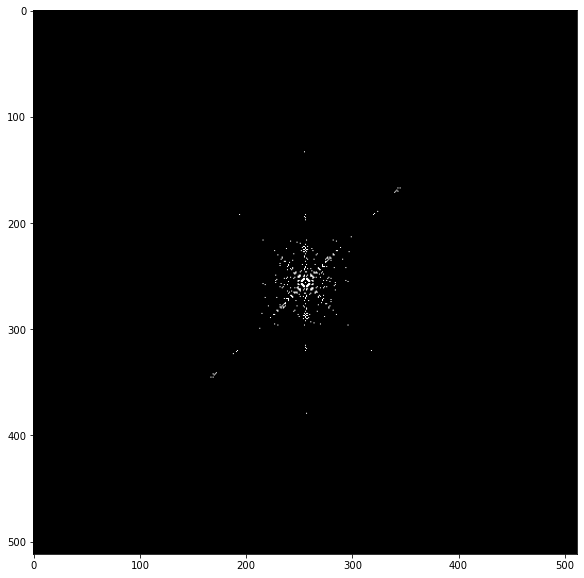

In [5]:
blended_son = blend(son, sonrot, 0.5)
ft_blended_son = computeFT(blended_son)
tv_ft_blended_son = toVisualizeFT(ft_blended_son)

fig = plt.figure(figsize=(10,10))
plt.imshow(thresholdImage(tv_ft_blended_son, threshold))
plt.gray()
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

>On voit une superposition de son et sonrot, cela montre la linéarité des transformésers de Fourier

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

(512, 512)
-45.0


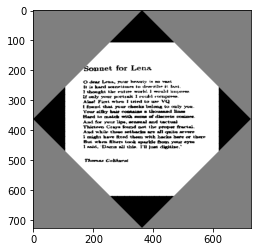

In [6]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

t = 3e5

def rectifyOrientation(I, threshold):
    ft_I = computeFT(I)
    tr_ft_I = thresholdImage(ft_I, threshold)#extraction de la partie imaginaire
    rot = mainOrientation(tr_ft_I)#recherche de l'angle de rotation
    print(rot[1])# utile pour la question suivante.
    new_img = rotateImage(I, -rot[1])# rectification de la rotation
    return new_img
print(sonrot.shape)
plt.gray()
plt.imshow(rectifyOrientation(sonrot, t))

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

(302, 443)


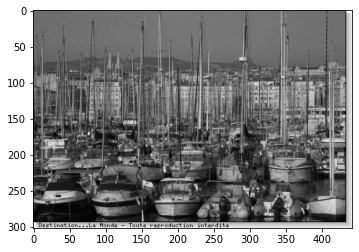

In [7]:
#aperçu de l'image
port_img = np.array(Image.open('img/port.jpg'))
print(port_img.shape)
plt.gray()
plt.imshow(port_img)

-45.0
40.0
-39.375
80.0
-39.375
120.0
-50.625
160.0
50.625
200.0
39.375
240.0
-39.375
280.0
-45.0
320.0
-56.25
360.0


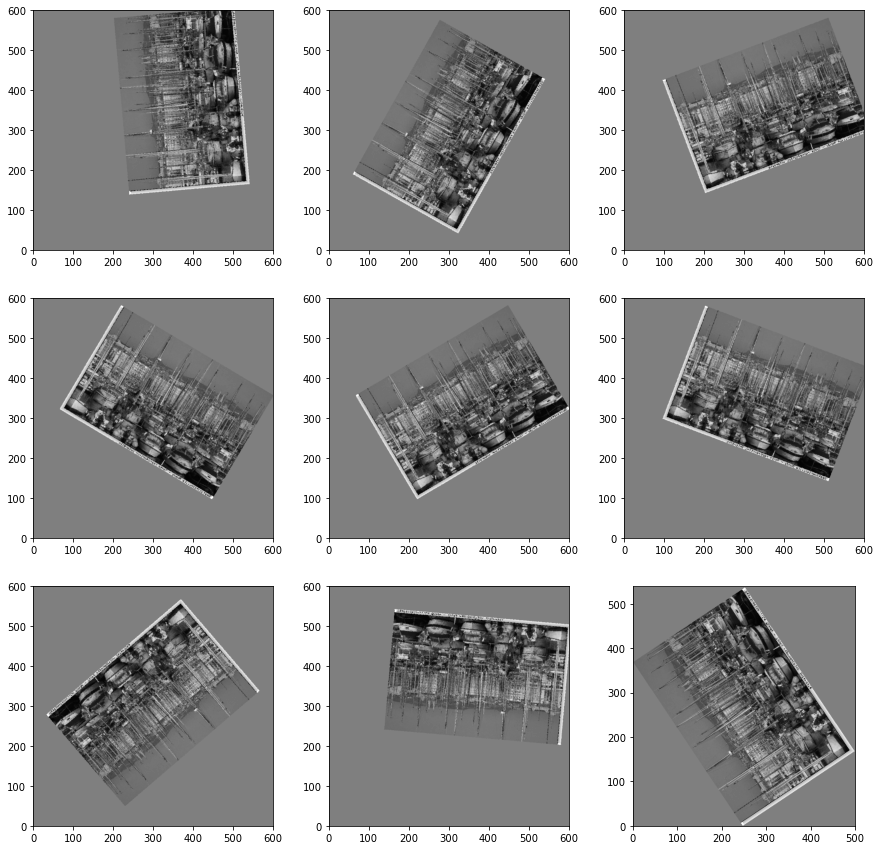

In [8]:
import math

t = 3e5
n = 9 # Prendre un carré

fig=plt.figure(figsize=(15,15))
for i in range(1,n+1):
    a=i*360/n
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    port_img_tmp = rotateImage(port_img,a)
    port_img_rectified = rectifyOrientation(port_img_tmp, t) 
    print(a)# cela permet de mettre en evidence que la valeur retourné par rectifyOrientation ne renvoit pas la même valeur que la rotation effectué 
    if i%9==0:
        plt.xlim(0,500)
        plt.ylim(0,540)
        
    else:
        plt.xlim(0, 600)
        plt.ylim(0, 600)
    plt.gray()
    plt.imshow(port_img_rectified) 
plt.show()

Rectify fonctionne mais mainorientation ne fonctionne pas bien,elle renvoit une mauvaise valeur. On s'en rend compte lorsque l'on essaye de remettre droite la photo son, sont but était d'inclinerun care a 45 degres. On voit qu'elle ne trouve pas le même angle d'inclinaison que celui qui a été appliqué à la photo. 

En essayant de faire la même chose sur la photo son, on obtient aussi son decalage à 45 degres alors que celle ci est droite 

-45.0


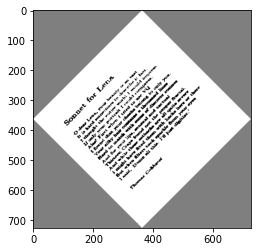

In [9]:
plt.gray()
plt.imshow(rectifyOrientation(son, t))

# --> FT normale

-45.0
-39.375
-39.375
-50.625
50.625
39.375
-39.375
-45.0
-56.25


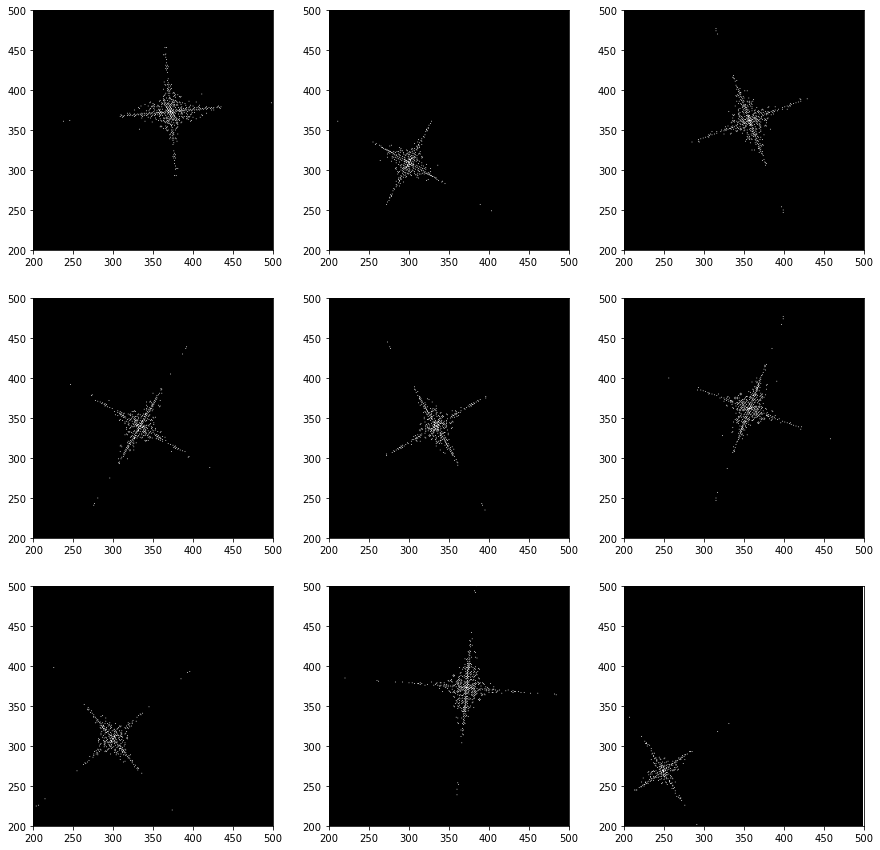

In [10]:
fts = []
fts_sec = []
#calcul des differentes series de Fourier des photos si dessus.
fig=plt.figure(figsize=(15,15))
for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    port_img_tmp = rotateImage(port_img, i*(360/n))
    port_img_rectified = rectifyOrientation(port_img_tmp, t)
    tf_port_img_rectified = computeFT(port_img_rectified)
    fts.append(tf_port_img_rectified)
    visu_tf_port_img_rectified = toVisualizeFT(tf_port_img_rectified)
    plt.xlim(200, 500)
    plt.ylim(200, 500)
#     fts.append(visu_tf_port_img_rectified)
#     print(visu_tf_port_img_rectified)
    tr_visu_tf_port_img_rectified = thresholdImage(3*visu_tf_port_img_rectified, t)
    plt.gray()
    plt.imshow(tr_visu_tf_port_img_rectified)
    fts_sec.append(tr_visu_tf_port_img_rectified)
plt.show()

# --> Reconstitution après FTI

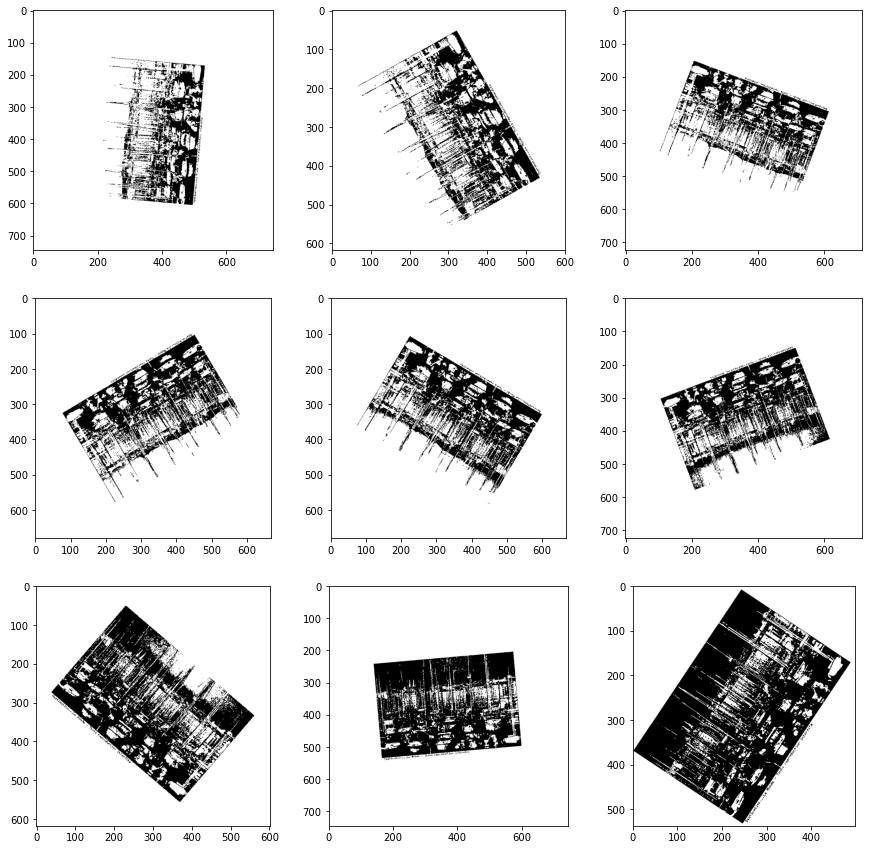

In [11]:
#reconstitution des images à partir des FT ci dessus.
fig=plt.figure(figsize=(15,15))
for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    ffts_inversed = computeFTI(fts[i-1])
#     print(ffts_inversed)
#     print(ffts_inversed.mean())
#     plt.xlim(200, 500)
#     plt.ylim(200, 500)
    tr_ffts_inversed = thresholdImage(ffts_inversed, 80+i*5) # On tente ici plusieurs threshold pour voir les résultats
    plt.gray()
    plt.imshow(tr_ffts_inversed)
plt.show()

On observe une perte d'information sur les images dus à la perte de la partie imaginaire de la FT. On perd de la resolution et du contraste. 

# --> FT Seconde

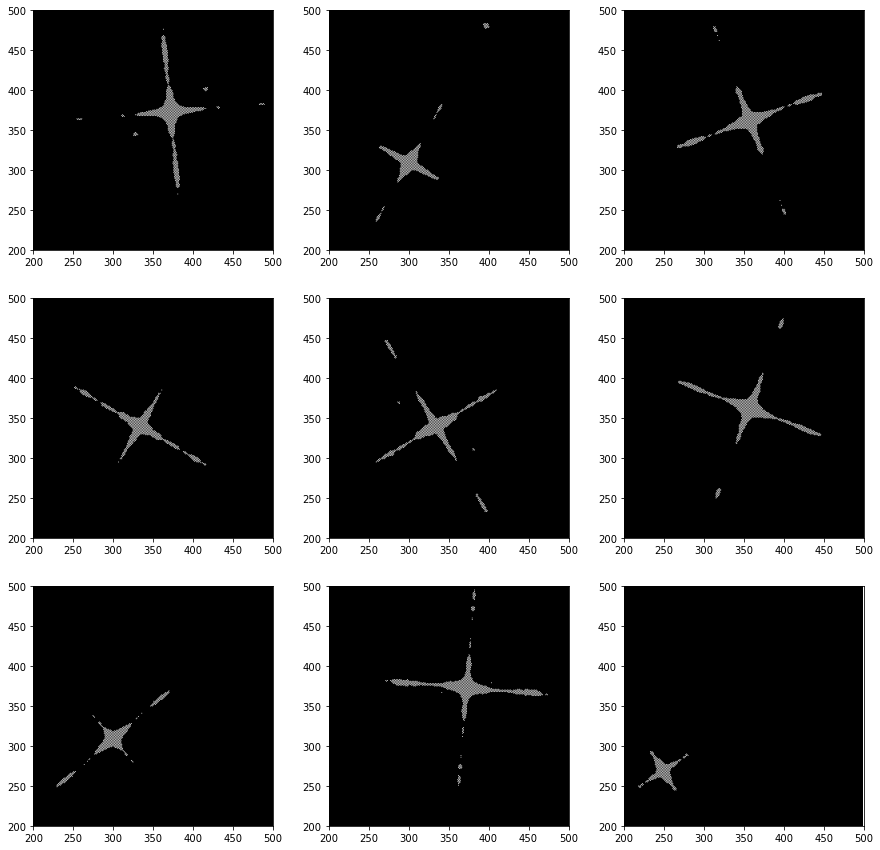

In [12]:
# calcul des FT seconde à partir des images reconstituer ci dessus. 
fts_sec_recons = []

fig=plt.figure(figsize=(15,15))
for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    fts_tmp = computeFT(fts_sec[i-1])
    fts_sec_recons.append(fts_tmp)
    visu_fts_tmp = toVisualizeFT(fts_tmp)
    plt.xlim(200, 500)
    plt.ylim(200, 500)
    tr_visu_fts_tmp = thresholdImage(20*visu_fts_tmp, t)
    plt.gray()
    plt.imshow(tr_visu_fts_tmp)
plt.show()

# --> Reconstitution après FT Seconde

>Impossible de retrouver l'image à partir de la FTT seconde car perte de la partie complexe. On observe cependant les contours de l'image grâce à la partie réelle.

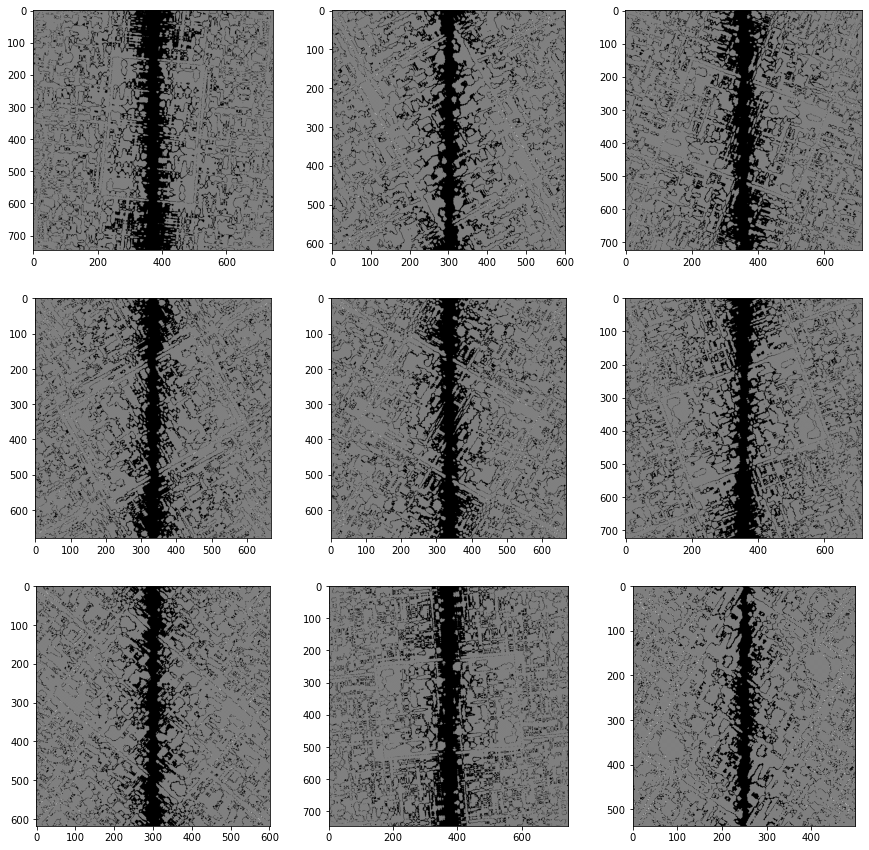

In [13]:
fig=plt.figure(figsize=(15,15))
for i in range(1,n+1):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i)
    ffts_inversed_2 = computeFTI(computeFTI(fts_sec_recons[i-1]))
#     print(ffts_inversed)
#     print(ffts_inversed.mean())
#     plt.xlim(200, 500)
#     plt.ylim(200, 500)
    ffts_inversed_2_tr = thresholdImage(ffts_inversed_2, 1e-3)
    plt.gray()
    plt.imshow(ffts_inversed_2_tr)
plt.show()

In [14]:
# cercle = np.array(Image.open('img/cercle.jpg'))
# plt.imshow(cercle)

In [15]:
# tf_cercle = computeFT(cercle)
# visu_tf_cercle = toVisualizeFT(tf_cercle)
# tr_visu_tf_cercle = thresholdImage(visu_tf_cercle, t)
# plt.xlim(127, 129)
# plt.ylim(127, 129)
# plt.gray()
# plt.imshow(tr_visu_tf_cercle)

In [16]:
# plt.xlim(127, 129)
# plt.ylim(127, 129)
# plt.gray()
# plt.imshow(np.sinc(tr_visu_tf_cercle))

In [17]:
# tf_cercle2 = computeFT(tr_visu_tf_cercle)
# visu_tf_cercle2 = toVisualizeFT(tf_cercle2)
# tr_visu_tf_cercle2 = thresholdImage(visu_tf_cercle2, t)
# # plt.xlim(127, 129)
# # plt.ylim(127, 129)
# plt.gray()
# plt.imshow(tr_visu_tf_cercle2)

In [18]:
from scipy.ndimage.filters import gaussian_filter

size = 420

images = np.zeros((4, size, size))
images_blurred = np.zeros((4, size, size))
for i in range(1, 5):
    arr = plt.imread("img_new/cat{}.jpg".format(i))
    img_rgb = Image.fromarray(arr).crop((0, 0, size, size))
    img_gray = np.mean(img_rgb, axis=2)
    images[i-1] = np.array(img_gray)
    images_blurred[i-1] = gaussian_filter(images[i-1], sigma=5)
print(images.shape)
print(images_blurred.shape)

(4, 420, 420)
(4, 420, 420)


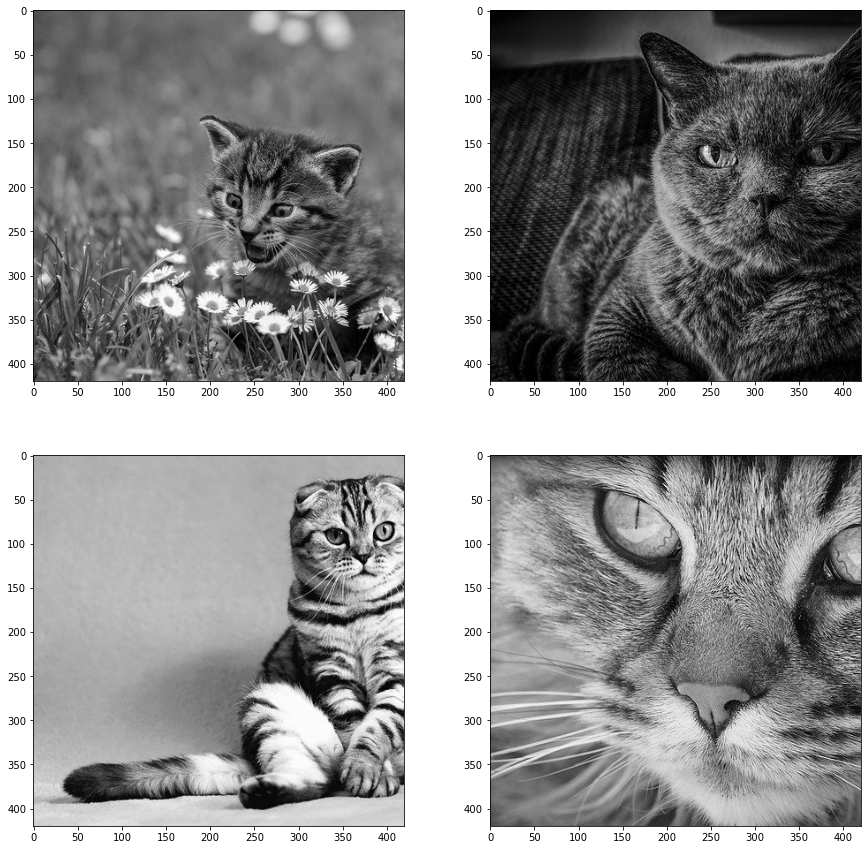

In [19]:
n = 4 # Prendre un carré
fig=plt.figure(figsize=(15,15))
for i in range(0,n):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i+1)
    plt.gray()
    plt.imshow(images[i])
plt.show()

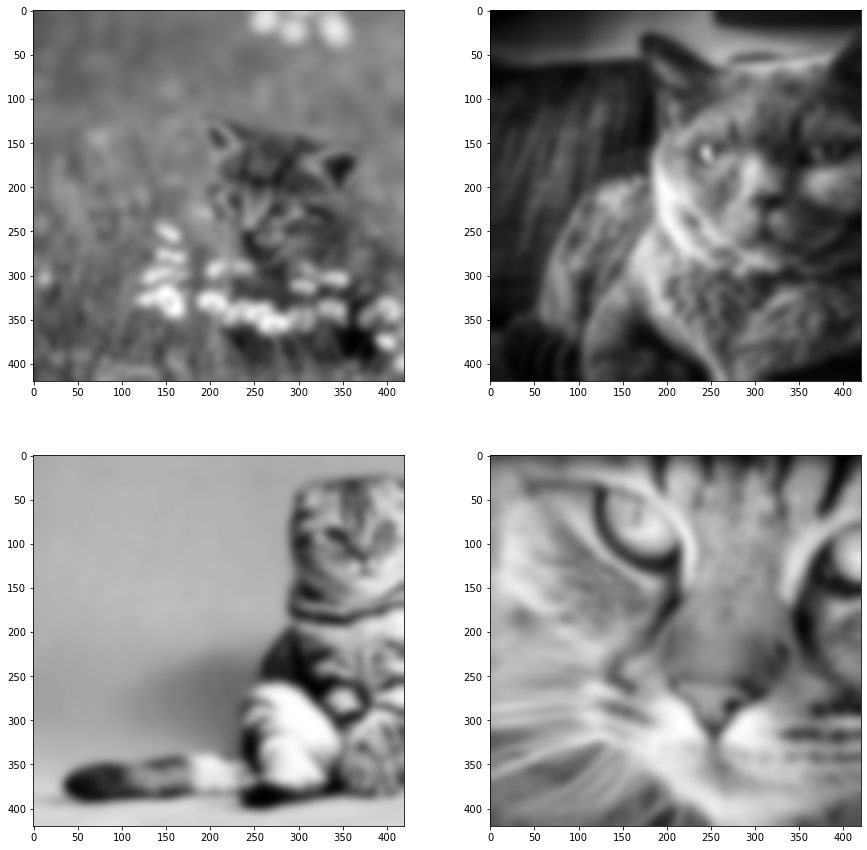

In [20]:
n = 4 # Prendre un carré
fig=plt.figure(figsize=(15,15))
for i in range(0,n):
    fig.add_subplot(int(np.sqrt(n)),int(np.sqrt(n)),i+1)
    plt.gray()
    plt.imshow(images_blurred[i])
plt.show()

In [21]:
threshold = 0

def is_blurred(I):
    if compute_magnitude_mean(I) > threshold:
        return False #Pas flou !
    return True #Flou !

In [22]:
size = 30

def compute_magnitude_mean(I):
    heigth = I.shape[0]
    width = I.shape[1]
    X = int(width/2)
    Y = int(heigth/2)
    fft = computeFT(I)
    fft_shift = toVisualizeFT(fft) 
    fft_shift[Y - size:Y + size, X - size:X + size] = 0 # On supprime les basses fréquences pour 
    fft_shift = toVisualizeFTI(fft_shift)
    new_img = computeFTI(fft_shift)
    magn = 10 * np.log(np.abs(new_img))
    return np.mean(magn)

In [23]:
for i in range(4):
    print(is_blurred(images[i]))
print("========================================")
for i in range(4):
    print(is_blurred(images_blurred[i]))

False
False
False
False
True
True
True
True
